# week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.


 

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv')
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)

In [10]:
make_mask = (df['Identification.Make'] == 'Honda')
fuel_mask = (df['Fuel Information.Fuel Type'] == 'Gasoline')
mpg_outliers = (df['Fuel Information.Highway mpg'] < df['Fuel Information.Highway mpg'].quantile(0.90))
hp_outliers = (df['Engine Information.Engine Statistics.Horsepower'] < df['Engine Information.Engine Statistics.Horsepower'].quantile(0.90))


hondas = df[ make_mask & fuel_mask & mpg_outliers & hp_outliers].reset_index()
hondas

,index,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
1,102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
2,103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
3,104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
4,105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
102,5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
103,5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
104,5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [18]:
hondas = hondas.filter(['Fuel Information.Highway mpg','Engine Information.Engine Statistics.Horsepower'])
hondas

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,25,271
1,31,190
2,31,190
3,31,190
4,28,271
...,...,...
101,25,250
102,24,250
103,25,250
104,24,250


In [19]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(hondas[["Fuel Information.Highway mpg","Engine Information.Engine Statistics.Horsepower"]])
scaled_df = pd.DataFrame(d, columns = ["Fuel Information.Highway mpg","Engine Information.Engine Statistics.Horsepower"])
scaled_df

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.454545,1.000000
1,1.000000,0.228571
2,1.000000,0.228571
3,1.000000,0.228571
4,0.727273,1.000000
...,...,...
101,0.454545,0.800000
102,0.363636,0.800000
103,0.454545,0.800000
104,0.363636,0.800000


### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

In [32]:
import sklearn.linear_model
import numpy as np

xs = scaled_df['Engine Information.Engine Statistics.Horsepower']
ys = scaled_df['Fuel Information.Highway mpg']

In [49]:
xs_reshape = np.array(xs).reshape(-1, 1)
print(xs.shape)
print(xs_reshape.shape)
#print(xs_reshape)

(106,)
(106, 1)


In [34]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression()

In [35]:
model.coef_

array([-0.22278952])

In [36]:
model.intercept_

0.7029077201105048

In [41]:
predicted = model.predict(xs_reshape)

model.predict([[1]])[0]

0.48011819522784116

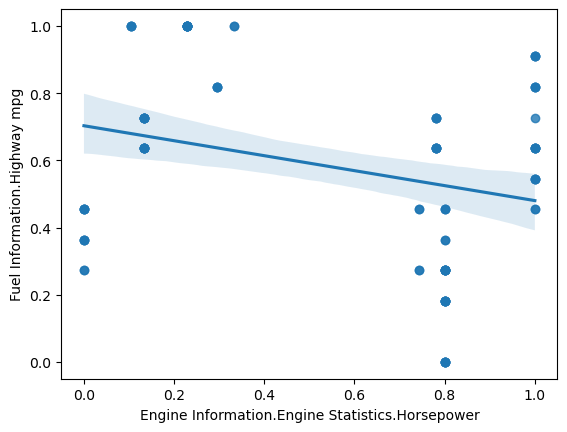

In [47]:
import seaborn as sns

#create scatterplot with regression line
sns.regplot(x="Engine Information.Engine Statistics.Horsepower",
            y="Fuel Information.Highway mpg",
            data=scaled_df);

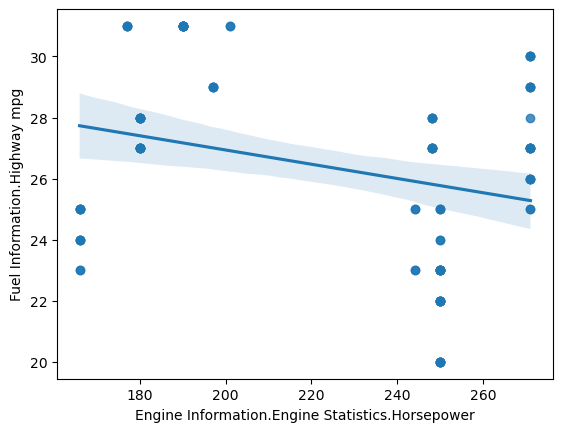

In [48]:
#create scatterplot with regression line
sns.regplot(x="Engine Information.Engine Statistics.Horsepower",
            y="Fuel Information.Highway mpg",
            data=hondas);